In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount=True)

if("code.ipynb" in os.listdir('/content/gdrive/MyDrive/MTP')):
    print("Successfully Loaded Lab Directory")
    os.chdir('/content/gdrive/MyDrive/MTP')

Mounted at /content/gdrive
Successfully Loaded Lab Directory


In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(gpus[0], True)
import os
from matplotlib import pyplot as plt
from matplotlib.image import imread
import pathlib
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.layers import Conv2D, Flatten, Dense,  MaxPool2D, BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.applications.nasnet import NASNetMobile


In [ ]:

img_width=256; img_height=256
batch_size=32

TRAINING_DIR = '/content/gdrive/MyDrive/MTP/dataset/dataset_updated/training_set'
VALIDATION_DIR = '/content/gdrive/MyDrive/MTP/dataset/dataset_updated/validation_set'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))


validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 7676 images belonging to 5 classes.
Found 850 images belonging to 5 classes.


In [ ]:

base_model=NASNetMobile(include_top=False, weights='imagenet')
base_model.summary()
x=base_model.output
print("Output Shape of the model = {}".format(x))
x=GlobalAveragePooling2D()(x)


x=Dense(1024,activation='relu')(x)
x =Dropout(0.5)(x)

predictions=Dense(5,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=predictions)


20004864/19993432 [==============================] - 0s 0us/step
Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           stem_bn1[0][0]                   
____________________________

In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = './CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

for layer in base_model.layers:
    layer.trainable=False
    

model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
             metrics =['accuracy'])


history = model.fit(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )
model.save('/content/drive/MyDrive/MTP/model_nasnet.h5')

Epoch 1/10
3838/3838 [==============================] - 4120s 1s/step - loss: 0.5935 - accuracy: 0.7918 - val_loss: 0.3358 - val_accuracy: 0.8800
Epoch 2/10
3838/3838 [==============================] - 262s 68ms/step - loss: 0.4539 - accuracy: 0.8361 - val_loss: 0.3934 - val_accuracy: 0.8624
Epoch 3/10
3838/3838 [==============================] - 258s 67ms/step - loss: 0.4213 - accuracy: 0.8485 - val_loss: 0.4142 - val_accuracy: 0.8612
Epoch 4/10
3838/3838 [==============================] - 259s 68ms/step - loss: 0.3955 - accuracy: 0.8615 - val_loss: 0.3278 - val_accuracy: 0.8859
Epoch 5/10
3838/3838 [==============================] - 259s 67ms/step - loss: 0.3870 - accuracy: 0.8602 - val_loss: 0.3189 - val_accuracy: 0.8918
Epoch 6/10
3838/3838 [==============================] - 259s 68ms/step - loss: 0.3657 - accuracy: 0.8656 - val_loss: 0.3357 - val_accuracy: 0.8894
Epoch 7/10
3838/3838 [==============================] - 256s 67ms/step - loss: 0.3612 - accuracy: 0.8721 - val_loss: 0.

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = './CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

for layer in base_model.layers:
    layer.trainable=False
    

model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
             metrics =['accuracy'])


history = model.fit(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )
model.save('/content/drive/MyDrive/MTP/model_nasnet_2.h5')

Epoch 1/10
240/240 [==============================] - 1902s 8s/step - loss: 0.4848 - accuracy: 0.8194 - val_loss: 0.3419 - val_accuracy: 0.8741
Epoch 2/10
240/240 [==============================] - 162s 676ms/step - loss: 0.3609 - accuracy: 0.8636 - val_loss: 0.3240 - val_accuracy: 0.8824
Epoch 3/10
240/240 [==============================] - 160s 666ms/step - loss: 0.3177 - accuracy: 0.8826 - val_loss: 0.3050 - val_accuracy: 0.8894
Epoch 4/10
240/240 [==============================] - 158s 660ms/step - loss: 0.2984 - accuracy: 0.8915 - val_loss: 0.2979 - val_accuracy: 0.8847
Epoch 5/10
240/240 [==============================] - 158s 660ms/step - loss: 0.2922 - accuracy: 0.8910 - val_loss: 0.2569 - val_accuracy: 0.8953
Epoch 6/10
240/240 [==============================] - 159s 663ms/step - loss: 0.2769 - accuracy: 0.8924 - val_loss: 0.2687 - val_accuracy: 0.8965
Epoch 7/10
240/240 [==============================] - 158s 656ms/step - loss: 0.2673 - accuracy: 0.8994 - val_loss: 0.2966 - v

FailedPreconditionError: ignored

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']


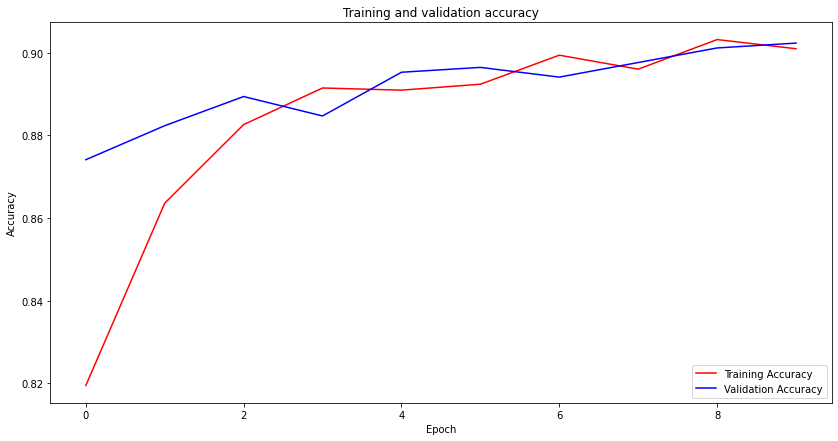

In [ ]:
epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
#plt.show()
plt.savefig('accuracy_nesnet.png')

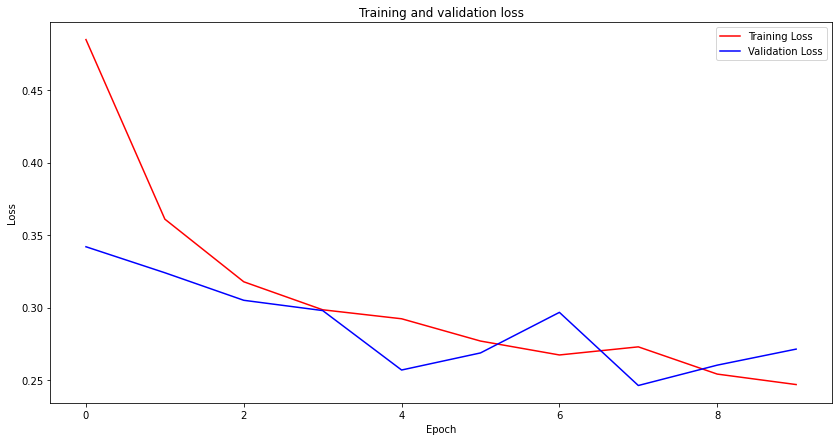

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.savefig('loss_nesnet.png')

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
base_model=ResNet50(include_top=False, weights='imagenet')
base_model.summary()
x=base_model.output
print("Output Shape of the model = {}".format(x))
x=GlobalAveragePooling2D()(x)


x=Dense(1024,activation='relu')(x)
x =Dropout(0.5)(x)

predictions=Dense(5,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=predictions)

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
__________________________

In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = './CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

for layer in base_model.layers:
    layer.trainable=False
    

model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
             metrics =['accuracy'])


history = model.fit(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )
model.save('/content/drive/MyDrive/MTP/model_resnet.h5')

Epoch 1/10
240/240 [==============================] - 1970s 8s/step - loss: 1.4585 - accuracy: 0.4033 - val_loss: 1.2688 - val_accuracy: 0.4588
Epoch 2/10
240/240 [==============================] - 176s 732ms/step - loss: 1.3035 - accuracy: 0.4698 - val_loss: 1.2526 - val_accuracy: 0.4976
Epoch 3/10
240/240 [==============================] - 176s 734ms/step - loss: 1.2632 - accuracy: 0.5073 - val_loss: 1.1280 - val_accuracy: 0.5647
Epoch 4/10
240/240 [==============================] - 176s 732ms/step - loss: 1.2351 - accuracy: 0.5188 - val_loss: 1.0894 - val_accuracy: 0.5800
Epoch 5/10
240/240 [==============================] - 176s 732ms/step - loss: 1.2187 - accuracy: 0.5238 - val_loss: 1.2267 - val_accuracy: 0.5106
Epoch 6/10
240/240 [==============================] - 175s 728ms/step - loss: 1.2062 - accuracy: 0.5341 - val_loss: 1.1100 - val_accuracy: 0.6106
Epoch 7/10
240/240 [==============================] - 174s 723ms/step - loss: 1.2172 - accuracy: 0.5241 - val_loss: 1.0773 - v

FailedPreconditionError: ignored

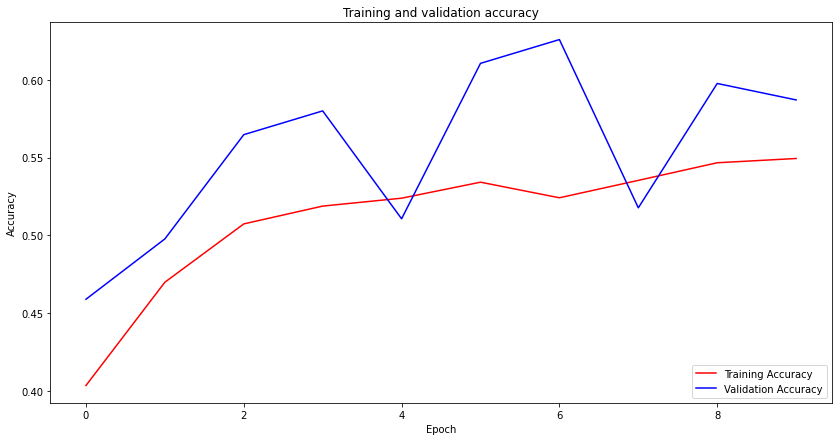

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = './CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

for layer in base_model.layers:
    layer.trainable=False
    

model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
             metrics =['accuracy'])


history = model.fit(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/30
240/240 [==============================] - 181s 738ms/step - loss: 1.1492 - accuracy: 0.5662 - val_loss: 1.0859 - val_accuracy: 0.5741
Epoch 2/30
240/240 [==============================] - 176s 732ms/step - loss: 1.1544 - accuracy: 0.5664 - val_loss: 0.9854 - val_accuracy: 0.6435
Epoch 3/30
240/240 [==============================] - 176s 732ms/step - loss: 1.1344 - accuracy: 0.5696 - val_loss: 1.0423 - val_accuracy: 0.5929
Epoch 4/30
240/240 [==============================] - 175s 729ms/step - loss: 1.1311 - accuracy: 0.5707 - val_loss: 1.0404 - val_accuracy: 0.5929
Epoch 5/30
240/240 [==============================] - 176s 732ms/step - loss: 1.1253 - accuracy: 0.5756 - val_loss: 1.0402 - val_accuracy: 0.6129
Epoch 6/30
240/240 [==============================] - 175s 730ms/step - loss: 1.1288 - accuracy: 0.5723 - val_loss: 0.9584 - val_accuracy: 0.6518
Epoch 7/30
240/240 [==============================] - 174s 724ms/step - loss: 1.1313 - accuracy: 0.5662 - val_loss: 1.0232 -

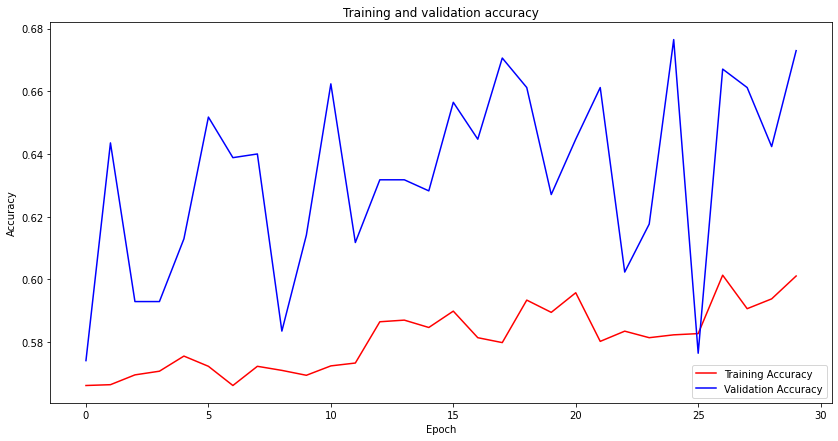

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
#plt.show()

In [ ]:

base_model=EfficientNetB7(include_top=False, weights='imagenet')
base_model.summary()
x=base_model.output
print("Output Shape of the model = {}".format(x))
x=GlobalAveragePooling2D()(x)


x=Dense(1024,activation='relu')(x)
x =Dropout(0.5)(x)

predictions=Dense(5,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=predictions)


258088960/258076736 [==============================] - 3s 0us/step
Model: "efficientnetb7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
__________________

In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = './CNN_sep_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

for layer in base_model.layers:
    layer.trainable=False
    

model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
             metrics =['accuracy'])


history = model.fit(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/10
240/240 [==============================] - 1900s 8s/step - loss: 1.6051 - accuracy: 0.2603 - val_loss: 1.5433 - val_accuracy: 0.2682
Epoch 2/10
240/240 [==============================] - 261s 1s/step - loss: 1.5575 - accuracy: 0.2692 - val_loss: 1.5423 - val_accuracy: 0.2682
Epoch 3/10
240/240 [==============================] - 259s 1s/step - loss: 1.5536 - accuracy: 0.2705 - val_loss: 1.5463 - val_accuracy: 0.2682
Epoch 4/10
240/240 [==============================] - 257s 1s/step - loss: 1.5546 - accuracy: 0.2637 - val_loss: 1.5453 - val_accuracy: 0.2682
Epoch 5/10
240/240 [==============================] - 257s 1s/step - loss: 1.5519 - accuracy: 0.2763 - val_loss: 1.5417 - val_accuracy: 0.2718
Epoch 6/10
240/240 [==============================] - 257s 1s/step - loss: 1.5479 - accuracy: 0.2680 - val_loss: 1.5429 - val_accuracy: 0.2718
Epoch 7/10
240/240 [==============================] - 258s 1s/step - loss: 1.5510 - accuracy: 0.2688 - val_loss: 1.5435 - val_accuracy: 0.268

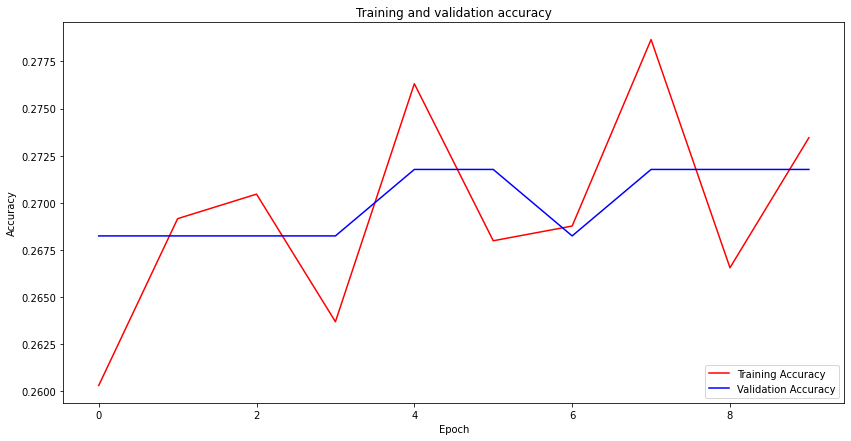

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')

In [ ]:
history =

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')